# Exploratory Analysis Results - Topography x Weather interactions

In [20]:
# data wrangling
library(dplyr)
library(readr)
library(tidyr)
# for plotting
library(ggplot2)
library(viridis)
library(ggpubr)
fig <- function(width, heigth){
 options(repr.plot.width = width, repr.plot.height = heigth)
 }
# read results
results <- suppressMessages(read_csv('/Users/rebeccawillison/Documents/research/wildfire/wildfires/results/IPPP_byMonthYear_topoWeatherInt.csv')) 
model_terms <- suppressMessages(read_csv('/Users/rebeccawillison/Documents/research/wildfire/wildfires/results/IPPP_byMonthYear_topoWeatherInt_terms.csv')) 

## Modeling
m0: `~ 1`  
m1: `~ bi`  
m2: `~ bi * wind * elev * slope * aspect`  
m3: `~ bi * wind * elev * slope`  

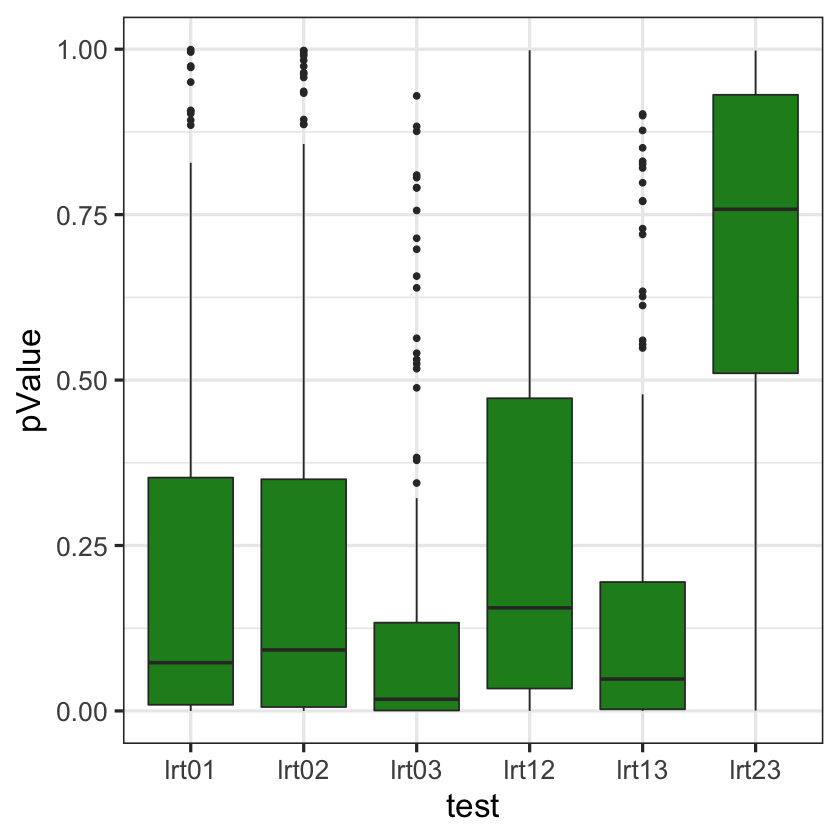

In [13]:
ggplot(results %>% 
         tidyr::gather(test, pValue, -c(lag, year, month)) %>%
         dplyr::mutate(test = substr(test, 1, 5)), 
     aes(test, pValue)) +
  geom_boxplot(fill = 'forestgreen') +
  theme_bw(base_size = 20)

In [21]:
head(model_terms)

Df,Deviance,Npar,dataset,term,year,Month
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,5.7392828,4,1,1,1980,6
1,3.7357342,5,1,2,1980,6
1,3.1093490,8,1,3,1980,6
1,1.5117616,15,1,4,1980,6
1,0.9241283,22,1,5,1980,6
1,0.8477795,25,1,6,1980,6


In [40]:
term_names <- c("bi","wind","elev","aspect","slope","bi:wind","bi:elev","wind:elev","bi:aspect","wind:aspect","elev:aspect",             
"bi:slope","wind:slope","elev:slope","aspect:slope","bi:wind:elev","bi:wind:aspect","bi:elev:aspect",
"wind:elev:aspect","bi:wind:slope","bi:elev:slope","wind:elev:slope","bi:aspect:slope","wind:aspect:slope",
"elev:aspect:slope","bi:wind:elev:aspect","bi:wind:elev:slope","bi:wind:aspect:slope","bi:elev:aspect:slope",
"wind:elev:aspect:slope","bi:wind:elev:aspect:slope")
terms <- data.frame(term_names = term_names, Npar = 1:nrow(model_terms))
term_plot <- model_terms %>% 
  dplyr::left_join(terms, by = 'Npar') %>%
  dplyr::group_by(dataset, year, Month) %>%
  dplyr::mutate(rank = row_number()) %>%
  dplyr::ungroup() %>%
  dplyr::group_by(Npar) %>%
  dplyr::mutate(mean_rank = mean(rank))%>% 
  ungroup()

In [41]:
head(term_plot)

Df,Deviance,Npar,dataset,term,year,Month,term_names,rank,mean_rank
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>
1,5.7392828,4,1,1,1980,6,aspect,1,11.127389
1,3.7357342,5,1,2,1980,6,slope,2,16.707006
1,3.1093490,8,1,3,1980,6,wind:elev,3,13.299363
1,1.5117616,15,1,4,1980,6,aspect:slope,4,7.630573
1,0.9241283,22,1,5,1980,6,wind:elev:slope,5,16.968153
1,0.8477795,25,1,6,1980,6,elev:aspect:slope,6,18.579618


In [46]:
rank_df <- term_plot  %>% 
  dplyr::select(term_names, mean_rank) %>% 
  distinct() %>% 
  dplyr::mutate(term_names = factor(term_names))

term_plot$Effect <- factor(term_plot$term_names, 
                           levels = unlist(rank_df[order(rank_df$mean_rank, decreasing = T),'term_names']))

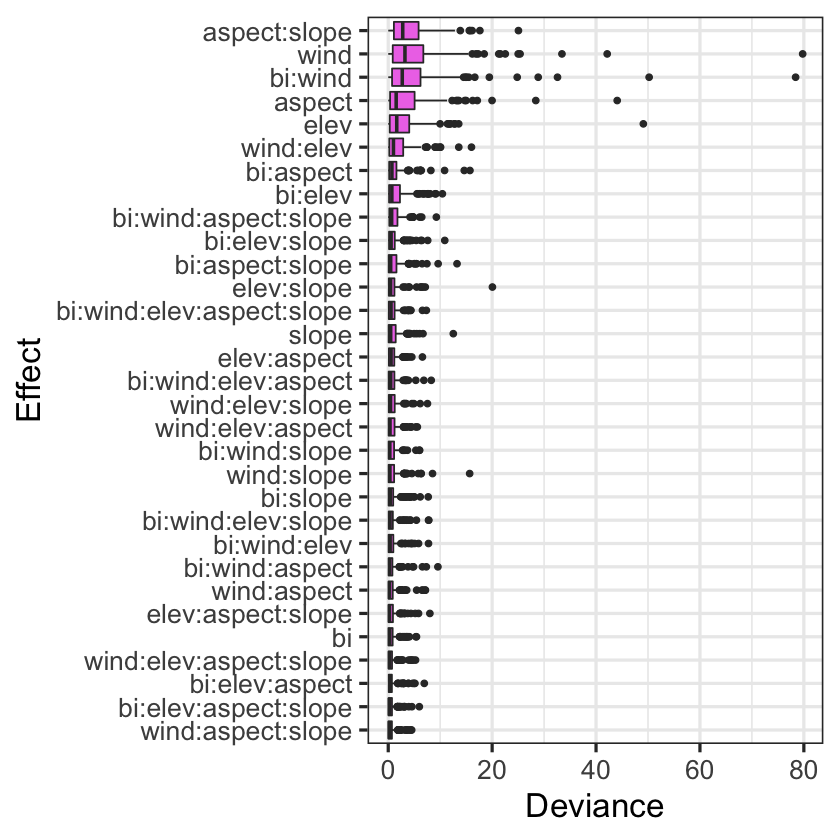

In [48]:
ggplot(term_plot, aes(Effect, Deviance)) + 
  geom_boxplot(fill = 'orchid2') +
  theme_bw(base_size = 20) +
  coord_flip()